# Setup

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report 

%matplotlib inline

# Load data

In [10]:
dataset = pd.read_excel("./maliciousornot.xlsx")
dataset

Type  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
0       1   23.303047                  13.445560                 159.066933   
1       1   26.645007                  23.018073                 172.149800   
2       1   25.505113                  27.525833                 168.393333   
3       1   14.792707                  26.398893                 100.491960   
4       1   26.282313                  18.575080                 174.999533   
..    ...         ...                        ...                        ...   
543     1   27.927387                  29.002513                 183.937333   
544     1   26.075060                  36.593167                 169.947733   
545     1   21.502533                  36.372960                 140.284600   
546     1   26.683867                  37.992127                 181.476200   
547     0   10.051787                  31.787480                  62.072373   

     DIST_REMOTE_TCP_PORT  REMOTE_IPS   APP_BYTES  SOURCE_APP_PACKETS  \
0             1296.628667    0.153367    0.359585            0.388730   
1             1717.612000    0.109767    0.101865            0.112564   
2             1558.286000    0.141969    0.207124            0.255699   
3              500.128200    0.184585    0.367745            0.312693   
4             1680.047333    0.129922    0.172020          256.476000   
..                    ...         ...         ...                 ...   
543           1915.798000  143.782000    0.150129            0.315932   
544           1633.415333    0.126684    0.133937          186.528000   
545           1111.525533    0.109520    0.132513            0.119831   
546           1638.596667    0.152590  358.807333            0.455180   
547            234.455333    0.068173    0.056502            0.000000   

     REMOTE_APP_PACKETS  SOURCE_APP_BYTES  ...      SOURCE_I   SOURCE_J  \
0              0.190544          0.313341  ...     32.875560  22.448127   
1              0.090894          0.234714  ...     32.370380  30.323753   
2              0.165673          0.268004  ...     30.531007  33.069860   
3              0.136269          0.336398  ...     19.313420  34.326333   
4              0.135103          0.234326  ...     29.196813  21.593207   
..                  ...               ...  ...           ...        ...   
543            0.179922          0.223575  ...     32.966233  34.196800   
544            0.126826          0.226942  ...     30.686447  49.546500   
545            0.068679        205.958000  ...     24.585427  44.196773   
546          196.890667          0.310491  ...     33.341880  51.062040   
547            0.000000          0.205569  ...  12248.672000  39.339273   

       SOURCE_K     SOURCE_M    SOURCE_L    SOURCE_N  SOURCE_O    SOURCE_P  \
0    239.118533  2615.278000    0.210103    0.862174  0.922148    0.343781   
1    205.698933  2533.672000    0.160362    0.241709  0.312953  240.932000   
2    197.538333  2213.724667    0.187046    0.549869  0.583418  314.766000   
3    128.069607   735.360733    0.271761    1.122147  0.889764    0.333548   
4    197.149733  2040.150000    0.177979  265.543333  0.518133    0.210492   
..          ...          ...         ...         ...       ...         ...   
543  215.154867  2625.640667  182.642000    0.273704  0.531993    0.287046   
544  200.776667  2242.222000    0.151036    0.248963  0.416450    0.210880   
545  164.118733  1455.954667    0.147538    0.400776  0.440802    0.183678   
546  239.118533  2358.802000  213.730000    1.124479  1.215929  343.263333   
547   76.631920   347.926533    0.116528    0.083471  0.000000    0.000000   

       SOURCE_R    SOURCE_S  
0      0.595983    0.154015  
1    356.216667    0.115311  
2      0.468004    0.113445  
3      0.859842  224.092667  
4      0.306217    0.099456  
..          ...         ...  
543  266.838667    0.092163  
544    0.333160    0.085971  
545    0.287305    0.101295  
546    0.529403  160.621333  
547    0.37

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [12]:
dataset.isnull().sum()

Type                         0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
SOURCE_A                     0
SOURCE_B                     0
SOURCE_C                     0
SOURCE_D                     0
SOURCE_F                     0
SOURCE_E                     0
SOURCE_G                     0
SOURCE_H                     0
SOURCE_I                     0
SOURCE_J                     0
SOURCE_K                     0
SOURCE_M                     0
SOURCE_L                     0
SOURCE_N                     0
SOURCE_O                     0
SOURCE_P                     0
SOURCE_R                     0
SOURCE_S                     0
dtype: int64

# EDA

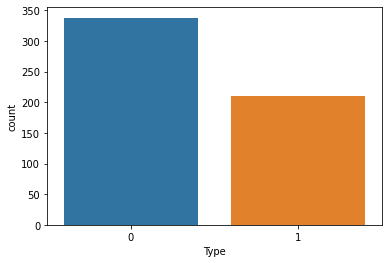

In [14]:
sns.countplot(x="Type", data=dataset)

In [15]:
dataset.describe().T

count         mean          std         min  \
Type                       548.0     0.383212     0.486613    0.000000   
URL_LENGTH                 548.0   949.973475  3202.802599   10.051787   
NUMBER_SPECIAL_CHARACTERS  548.0    25.015747     5.605685   12.577687   
TCP_CONVERSATION_EXCHANGE  548.0   119.725438    31.842845   56.722647   
DIST_REMOTE_TCP_PORT       548.0   857.123249   461.579998  185.880333   
REMOTE_IPS                 548.0     5.785481    27.796268    0.068173   
APP_BYTES                  548.0     6.499737    35.390031    0.025104   
SOURCE_APP_PACKETS         548.0    10.069604    46.976527    0.000000   
REMOTE_APP_PACKETS         548.0     3.181365    21.315640    0.000000   
SOURCE_APP_BYTES           548.0    22.809689    70.942060    0.151165   
REMOTE_APP_BYTES           548.0     1.141613     9.374137    0.064715   
APP_PACKETS                548.0   102.672734   365.368355    0.144430   
DNS_QUERY_TIMES            548.0  1054.061525  1057.620796    0.466579   
SOURCE_A                   548.0  3333.335724  2298.396221    0.999220   
SOURCE_B                   548.0   424.041644  2021.142069   13.056960   
SOURCE_C                   548.0     0.009134     0.003906    0.003455   
SOURCE_D                   548.0     0.235648     2.215631    0.002917   
SOURCE_F                   548.0     1.549989    23.059178    0.000000   
SOURCE_E                   548.0     0.090850     1.035261    0.000000   
SOURCE_G                   548.0     0.309790     2.788495    0.010210   
SOURCE_H                   548.0     0.019027     0.331812    0.001159   
SOURCE_I                   548.0   399.714125  2117.405314   10.271993   
SOURCE_J                   548.0    33.295952     7.956699   15.569907   
SOURCE_K                   548.0   139.830855    44.017609   65.297753   
SOURCE_M                   548.0  1155.666380   746.777340  239.895733   
SOURCE_L                   548.0    14.295530    49.075477    0.105246   
SOURCE_N                   548.0    32.855845   126.026487    0.044456   
SOURCE_O                   548.0    34.913670   149.880701    0.000000   
SOURCE_P                   548.0    11.758580    52.045464    0.000000   
SOURCE_R                   548.0    40.829159   119.531119    0.202720   
SOURCE_S                   548.0     2.637820    19.086225    0.071295   

                                   25%          50%          75%           max  
Type                          0.000000     0.000000     1.000000      1.000000  
URL_LENGTH                   15.838688    18.069900    23.264187  12828.981333  
NUMBER_SPECIAL_CHARACTERS    20.987638    24.423510    28.270650     50.880693  
TCP_CONVERSATION_EXCHANGE    97.470595   112.920683   137.175800    244.170333  
DIST_REMOTE_TCP_PORT        544.622900   723.637967  1037.270550   3239.628667  
REMOTE_IPS                    0.112309     0.125084     0.137694    159.326000  
APP_BYTES                     0.084718     0.122720     0.172215    358.807333  
SOURCE_APP_PACKETS            0.038394     0.085395     0.189799    405.439333  
REMOTE_APP_PACKETS            0.026383     0.045304     0.101201    209.844000  
SOURCE_APP_BYTES              0.211755     0.235168     0.266159    393.781333  
REMOTE_APP_BYTES              0.074737     0.079767     0.086013    101.036000  
APP_PACKETS                   0.304533     0.444688     0.764862   3721.492667  
DNS_QUERY_TIMES               1.108708  1325.126000  1814.114333   5046.618667  
SOURCE_A                   1927.132167  2827.712667  4181.336000  12703.334000  
SOURCE_B                     24.015480    34.255090    66.709667  12737.012667  
SOURCE_C                      0.006637     0.008242     0.010620      0.040324  
SOURCE_D                      0.016901     0.026800     0.042212     34.974000  
SOURCE_F                      0.019352     0.033860     0.055091    512.952000  
SOURCE_E                      0.010198     0.014313     0.019213     15.544000  
SOURCE_G                      0.019436

In [16]:
dataset.corr()["Type"].sort_values(ascending=False)

Type                         1.000000
SOURCE_K                     0.784173
TCP_CONVERSATION_EXCHANGE    0.744570
SOURCE_M                     0.734002
DIST_REMOTE_TCP_PORT         0.710294
SOURCE_A                     0.536539
SOURCE_J                     0.453197
NUMBER_SPECIAL_CHARACTERS    0.412095
APP_PACKETS                  0.240818
SOURCE_P                     0.205141
SOURCE_S                     0.141134
REMOTE_APP_PACKETS           0.139874
SOURCE_APP_PACKETS           0.129433
REMOTE_IPS                   0.126232
APP_BYTES                    0.096659
SOURCE_N                     0.088076
SOURCE_R                     0.069140
SOURCE_O                     0.063622
SOURCE_H                     0.055045
SOURCE_D                     0.029479
SOURCE_L                     0.022932
SOURCE_E                     0.001985
SOURCE_F                    -0.007551
DNS_QUERY_TIMES             -0.011055
SOURCE_G                    -0.017433
REMOTE_APP_BYTES            -0.048806
SOURCE_C    

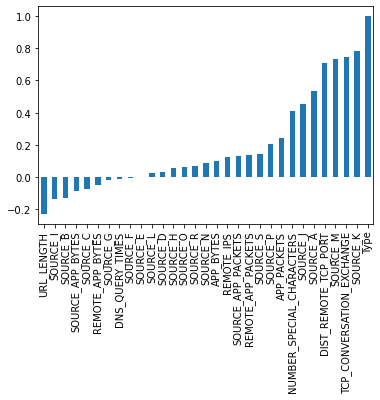

In [17]:
dataset.corr()["Type"].sort_values().plot(kind="bar")

In [18]:
dataset["Type"].value_counts(normalize=True) * 100

0    61.678832
1    38.321168
Name: Type, dtype: float64

# Data preprocessing

In [22]:
y = dataset["Type"].values
X = dataset.drop("Type", axis=1).values

## train-test split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, X_test.shape)

(438, 30) (110, 30)


## scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Create model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
X_train.shape

(438, 30)

In [35]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics="accuracy")

In [36]:
model.fit(X_train, y_train, epochs=700, validation_data=(X_test, y_test))

Epoch 1/700
14/14 [==============================] - 1s 20ms/step - loss: 0.6879 - accuracy: 0.6256 - val_loss: 0.6890 - val_accuracy: 0.5818
Epoch 2/700
14/14 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.6256 - val_loss: 0.6783 - val_accuracy: 0.5818
Epoch 3/700
14/14 [==============================] - 0s 6ms/step - loss: 0.6564 - accuracy: 0.6256 - val_loss: 0.6651 - val_accuracy: 0.5818
Epoch 4/700
14/14 [==============================] - 0s 5ms/step - loss: 0.6357 - accuracy: 0.6256 - val_loss: 0.6462 - val_accuracy: 0.5818
Epoch 5/700
14/14 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.6484 - val_loss: 0.6240 - val_accuracy: 0.6091
Epoch 6/700
14/14 [==============================] - 0s 5ms/step - loss: 0.5778 - accuracy: 0.7260 - val_loss: 0.5938 - val_accuracy: 0.6909
Epoch 7/700
14/14 [==============================] - 0s 6ms/step - loss: 0.5385 - accuracy: 0.7831 - val_loss: 0.5609 - val_accuracy: 0.7364
Epoch 8/700


# Evaluate model

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df

loss  accuracy  val_loss  val_accuracy
0    0.687924  0.625571  0.689022      0.581818
1    0.672559  0.625571  0.678309      0.581818
2    0.656437  0.625571  0.665130      0.581818
3    0.635663  0.625571  0.646172      0.581818
4    0.609652  0.648402  0.623953      0.609091
..        ...       ...       ...           ...
695  0.000161  1.000000  0.541959      0.936364
696  0.000160  1.000000  0.543961      0.936364
697  0.000167  1.000000  0.544145      0.936364
698  0.000167  1.000000  0.542067      0.936364
699  0.000181  1.000000  0.545547      0.936364

[700 rows x 4 columns]

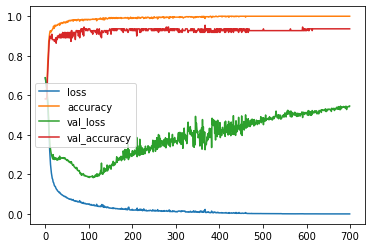

In [38]:
loss_df.plot()

# Regularizations

## Early Stopping

In [46]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [47]:
early_stop_cb = EarlyStopping(monitor="val_loss", mode="min", patience=25, verbose=1)

In [48]:
model.fit(X_train, y_train, epochs=700,
          validation_data=(X_test, y_test),
          callbacks=[early_stop_cb])

Epoch 1/700
14/14 [==============================] - 1s 30ms/step - loss: 0.6809 - val_loss: 0.6667
Epoch 2/700
14/14 [==============================] - 0s 11ms/step - loss: 0.6602 - val_loss: 0.6490
Epoch 3/700
14/14 [==============================] - 0s 12ms/step - loss: 0.6350 - val_loss: 0.6231
Epoch 4/700
14/14 [==============================] - 0s 7ms/step - loss: 0.6029 - val_loss: 0.5916
Epoch 5/700
14/14 [==============================] - 0s 7ms/step - loss: 0.5612 - val_loss: 0.5474
Epoch 6/700
14/14 [==============================] - 0s 6ms/step - loss: 0.5041 - val_loss: 0.4894
Epoch 7/700
14/14 [==============================] - 0s 4ms/step - loss: 0.4406 - val_loss: 0.4390
Epoch 8/700
14/14 [==============================] - 0s 5ms/step - loss: 0.3792 - val_loss: 0.3884
Epoch 9/700
14/14 [==============================] - 0s 6ms/step - loss: 0.3296 - val_loss: 0.3454
Epoch 10/700
14/14 [==============================] - 0s 6ms/step - loss: 0.2854 - val_loss: 0.3167
Epoch 

In [49]:
loss_df = pd.DataFrame(model.history.history)

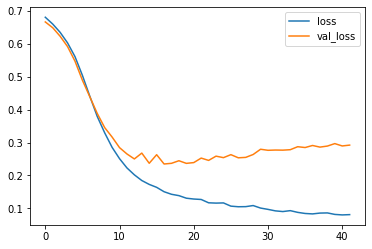

In [50]:
loss_df.plot()

## Dropout

In [51]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [52]:
model.fit(X_train, y_train, epochs=700,
          validation_data=(X_test, y_test),
          callbacks=[early_stop_cb])

Epoch 1/700
14/14 [==============================] - 1s 19ms/step - loss: 0.6905 - val_loss: 0.6811
Epoch 2/700
14/14 [==============================] - 0s 4ms/step - loss: 0.6898 - val_loss: 0.6762
Epoch 3/700
14/14 [==============================] - 0s 4ms/step - loss: 0.6778 - val_loss: 0.6711
Epoch 4/700
14/14 [==============================] - 0s 4ms/step - loss: 0.6673 - val_loss: 0.6663
Epoch 5/700
14/14 [==============================] - 0s 5ms/step - loss: 0.6588 - val_loss: 0.6616
Epoch 6/700
14/14 [==============================] - 0s 5ms/step - loss: 0.6573 - val_loss: 0.6544
Epoch 7/700
14/14 [==============================] - 0s 6ms/step - loss: 0.6438 - val_loss: 0.6456
Epoch 8/700
14/14 [==============================] - 0s 5ms/step - loss: 0.6439 - val_loss: 0.6349
Epoch 9/700
14/14 [==============================] - 0s 5ms/step - loss: 0.6283 - val_loss: 0.6228
Epoch 10/700
14/14 [==============================] - 0s 4ms/step - loss: 0.6038 - val_loss: 0.6078
Epoch 11

In [53]:
loss_df = pd.DataFrame(model.history.history)

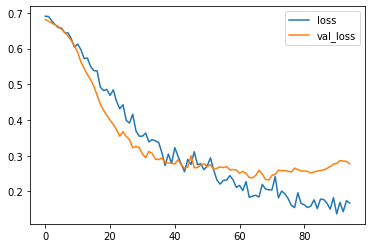

In [54]:
loss_df.plot()

# Predictions

In [55]:
predictions = model.predict(X_test)
predictions = [1 if x >=0.5 else 0 for x in predictions]

print(predictions)

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]


In [57]:
confusion_matrix(y_test, predictions)

array([[61,  3],
       [ 6, 40]])

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        64
           1       0.93      0.87      0.90        46

    accuracy                           0.92       110
   macro avg       0.92      0.91      0.92       110
weighted avg       0.92      0.92      0.92       110

